In [1]:
%pip install pandas matplotlib seaborn numpy scipy statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from scipy.stats import pearsonr

In [15]:
# Load the CSV data into a DataFrame
data_files = [
    "benchmark_bruteForceWithValidCheck.csv",
    "benchmark_ac3.csv",
    "benchmark_minimumRemainingValue.csv"
]

# It's actually called "Evil" instead of "Expert" for websudoku, but that's not important.
level_translation = {
    0: "Easy",
    1: "Medium",
    2: "Hard",
    3: "Expert",
    4: "Master",
    5: "Extreme"
}

In [19]:
# 1. Create histograms of the iterations per strategy, source and level
def plot_histograms(data):
    g = sns.FacetGrid(data, col="source", row="level", margin_titles=True, height=4, aspect=1.5, sharex=False, sharey=False)
    g.map(plt.hist, 'iterations', alpha=0.6, bins=50)
    plt.legend(title='Level')
    return plt

In [20]:
def plot_qq_plots(data):
    # Set up a FacetGrid with two columns for each unique source and rows for each level
    g = sns.FacetGrid(data, col="source", row="level", margin_titles=True, height=5, aspect=1.5, sharex=False, sharey=False)
    
    # Function to apply qqplot on each subset of the data
    def qqplot_wrap(data, **kwargs):
        ax = plt.gca()  # get the current axis from the grid
        qqplot(data['iterations'], line='s', ax=ax)  # 's' means standardized line fit
    
    # Map the data to the qqplot_wrap function
    g.map_dataframe(qqplot_wrap)
    
    # Add titles and any other formatting you need
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.fig.tight_layout()
    
    return plt

In [6]:
# 3. Calculate how much the level and iteration avg per strategy, source level correlate and visualize it
def correlation_analysis(data):
    # Create separate plots for each source
    sources = data['source'].unique()
    fig, axes = plt.subplots(nrows=len(sources), ncols=1, figsize=(8, 5 * len(sources)), squeeze=False)
    axes = axes.flatten()

    for i, source in enumerate(sources):
        ax = axes[i]
        # Filter data by source
        source_data = data[data['source'] == source]
        # Group by level and calculate mean iterations
        corr_df = source_data.groupby('level_int')['iterations'].mean().reset_index()
        # Calculate Pearson correlation
        correlation, _ = pearsonr(corr_df['level_int'], corr_df['iterations'])
        # Scatter plot of average iterations vs. level
        sns.scatterplot(data=corr_df, x='level_int', y='iterations', ax=ax)
        ax.set_title(f'Source: {source} - Correlation: {correlation:.2f}')
        ax.set_xlabel('Level')
        ax.set_ylabel('Average Iterations')

    plt.tight_layout()
    return plt

/var/folders/qq/czk1bcl906j40ln30pltk8b80000gn/T/ipykernel_38402/148421696.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Level')
/var/folders/qq/czk1bcl906j40ln30pltk8b80000gn/T/ipykernel_38402/148421696.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Level')
/var/folders/qq/czk1bcl906j40ln30pltk8b80000gn/T/ipykernel_38402/148421696.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Level')


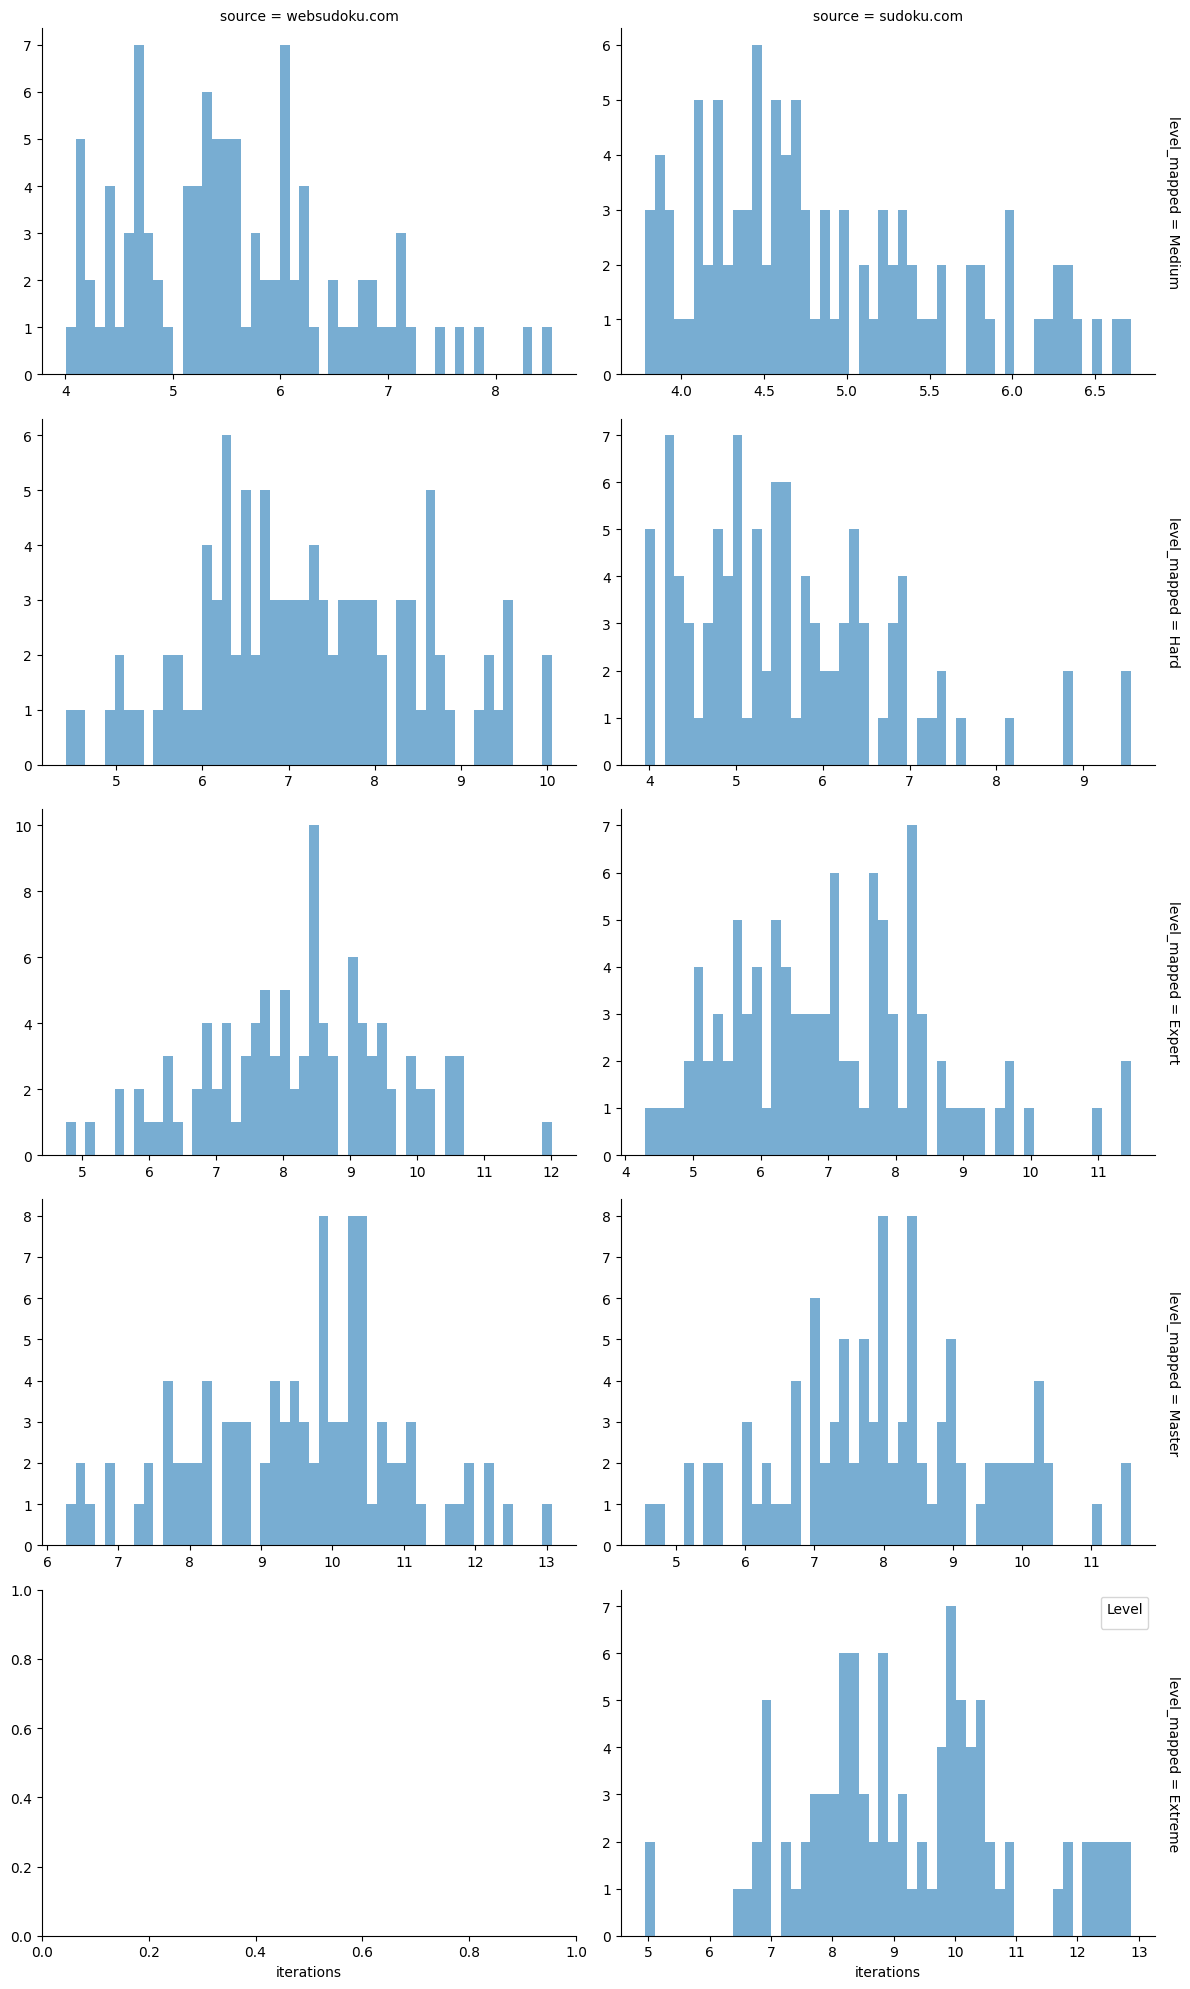

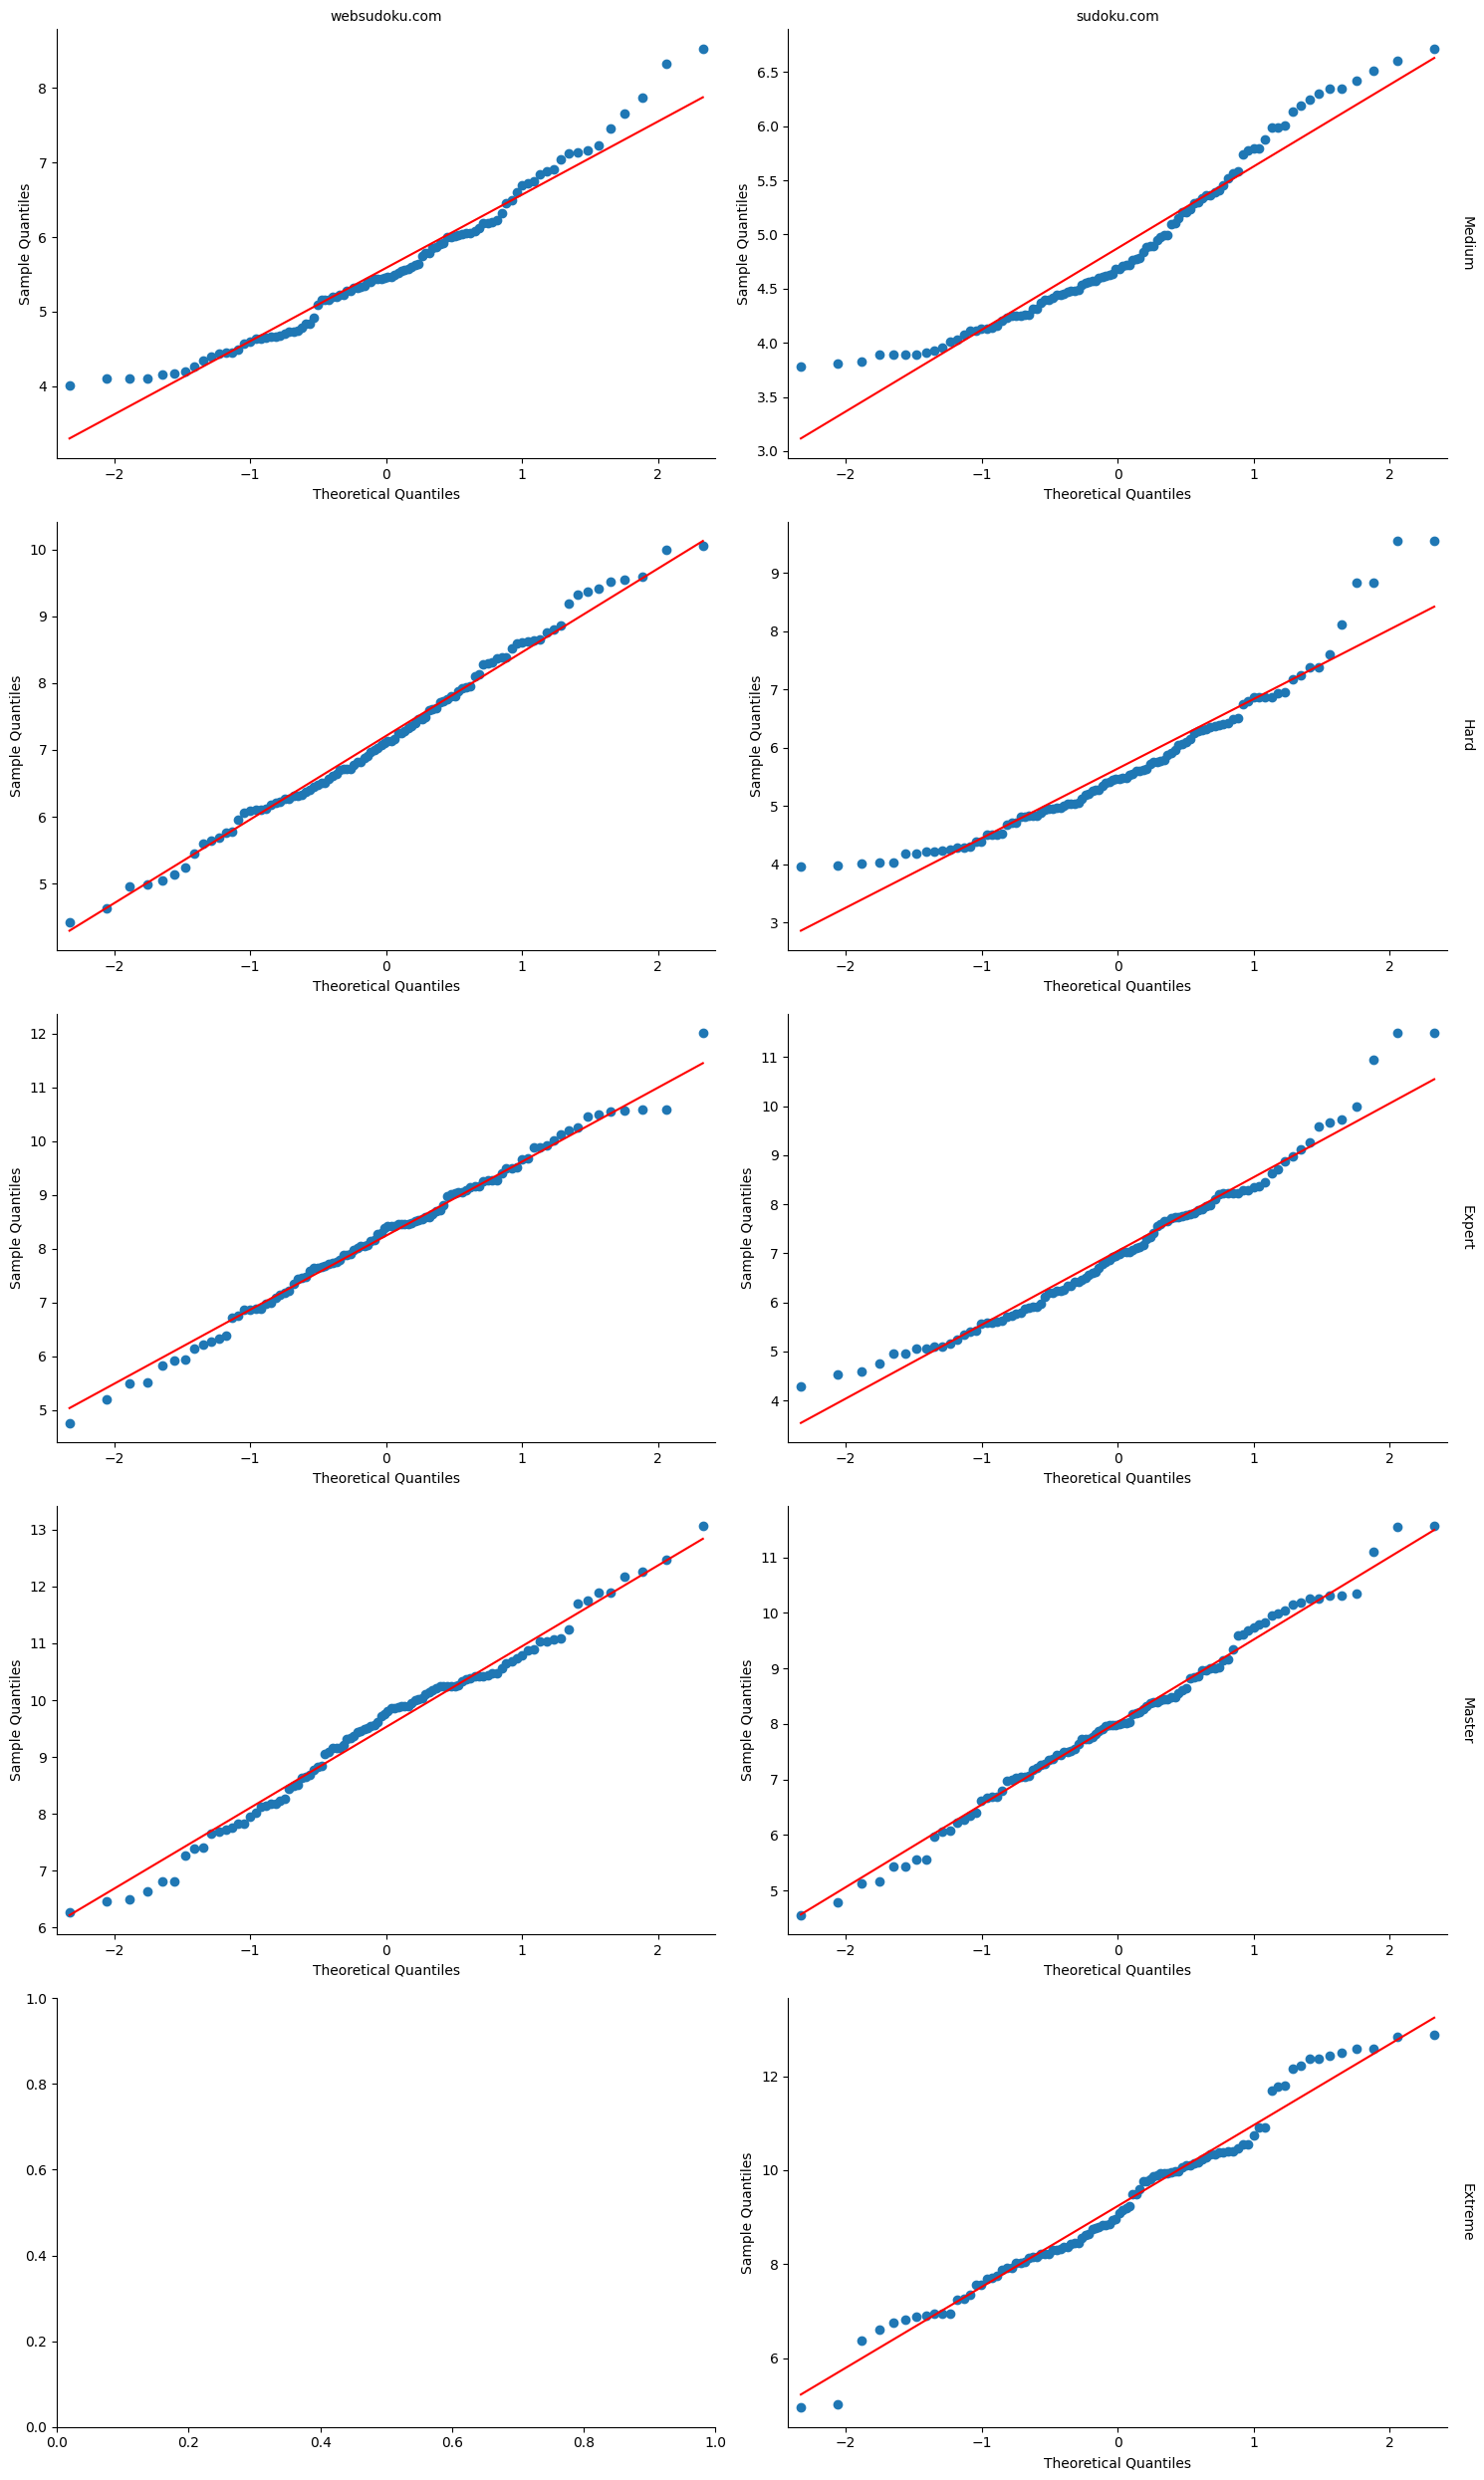

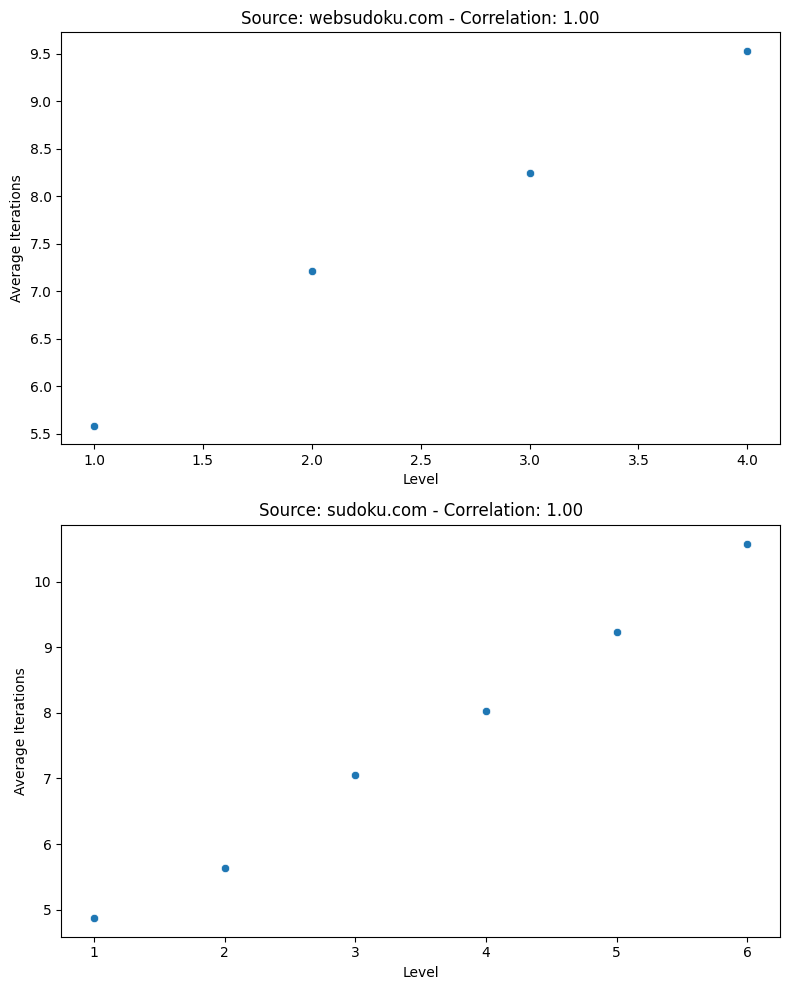

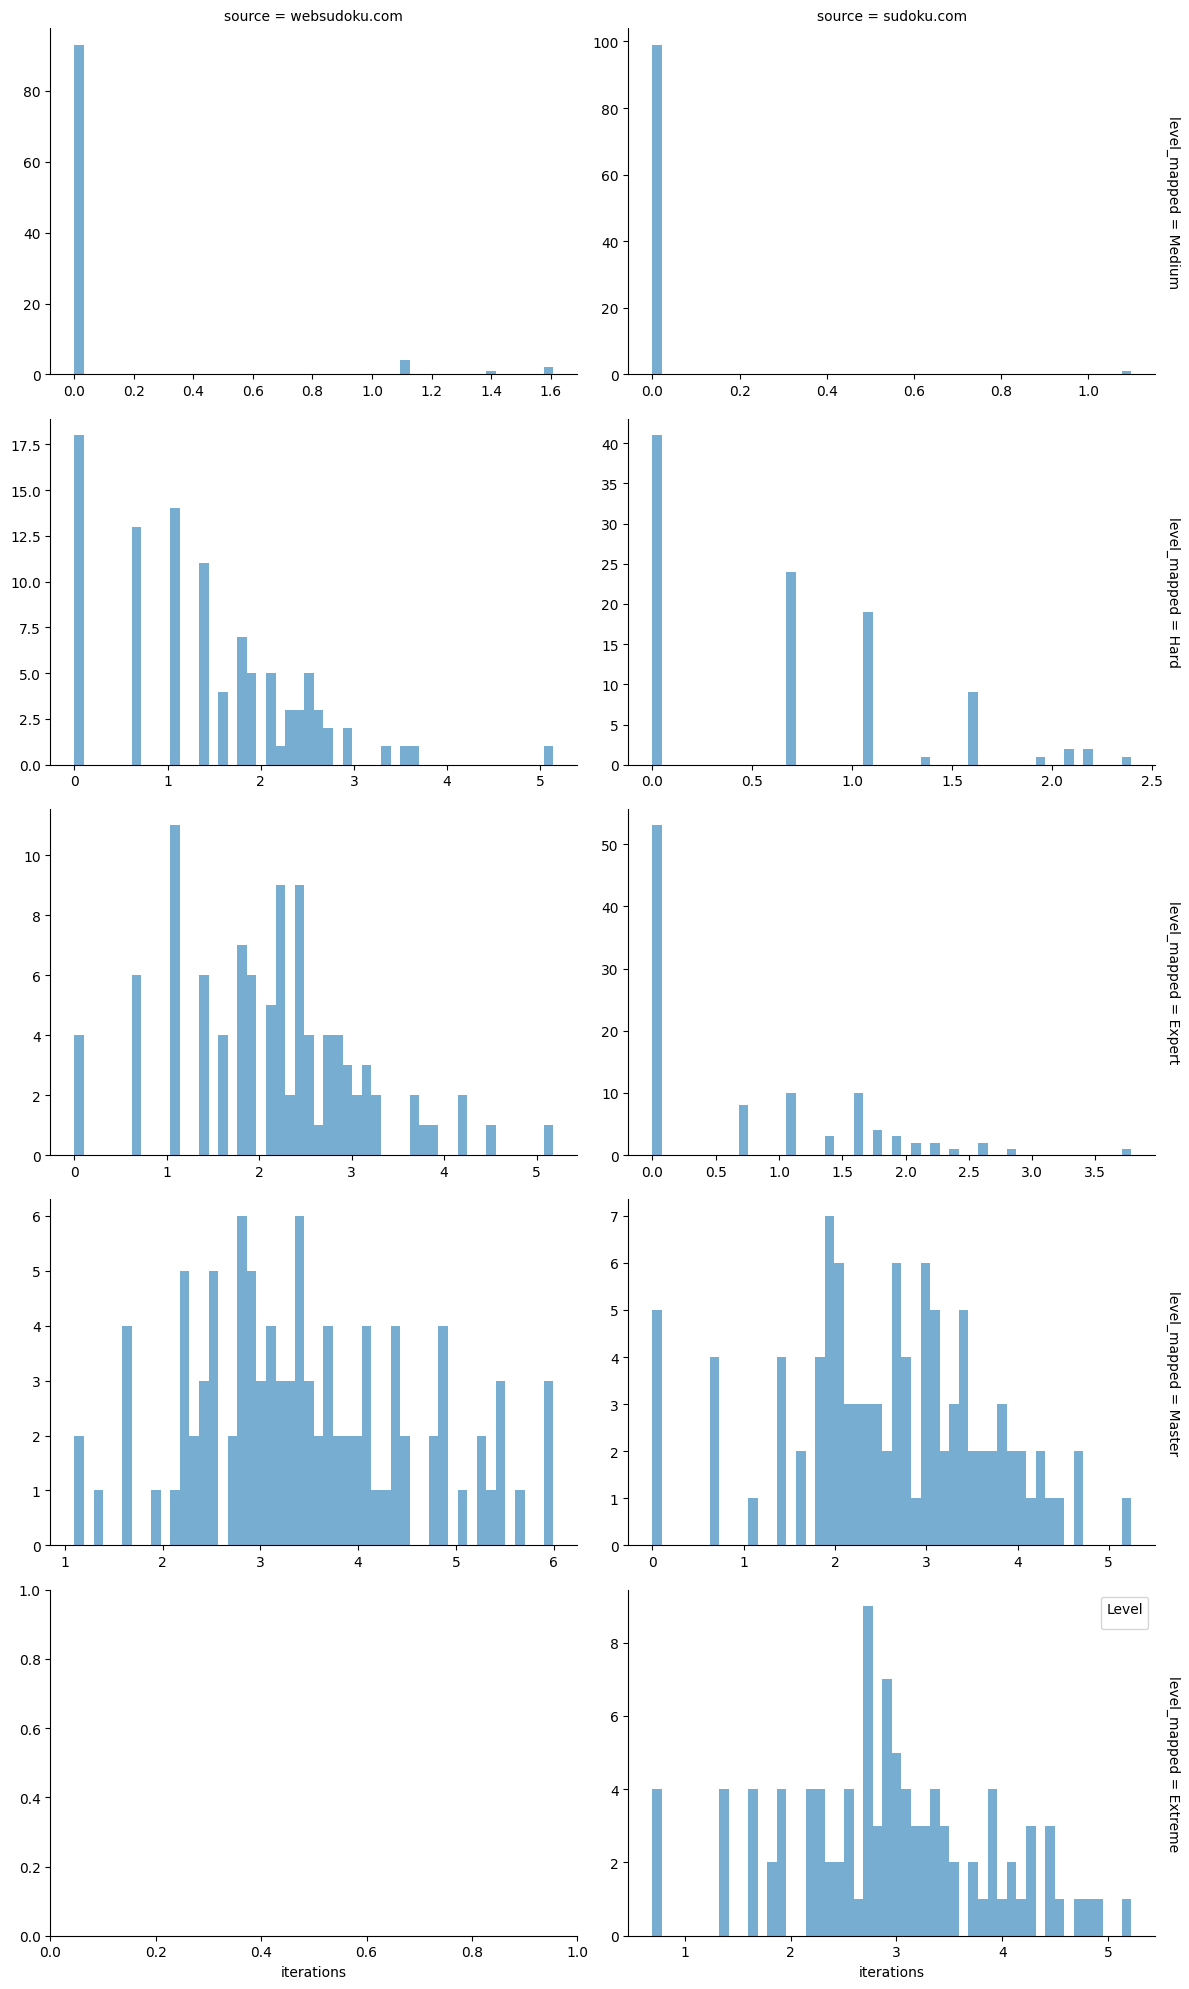

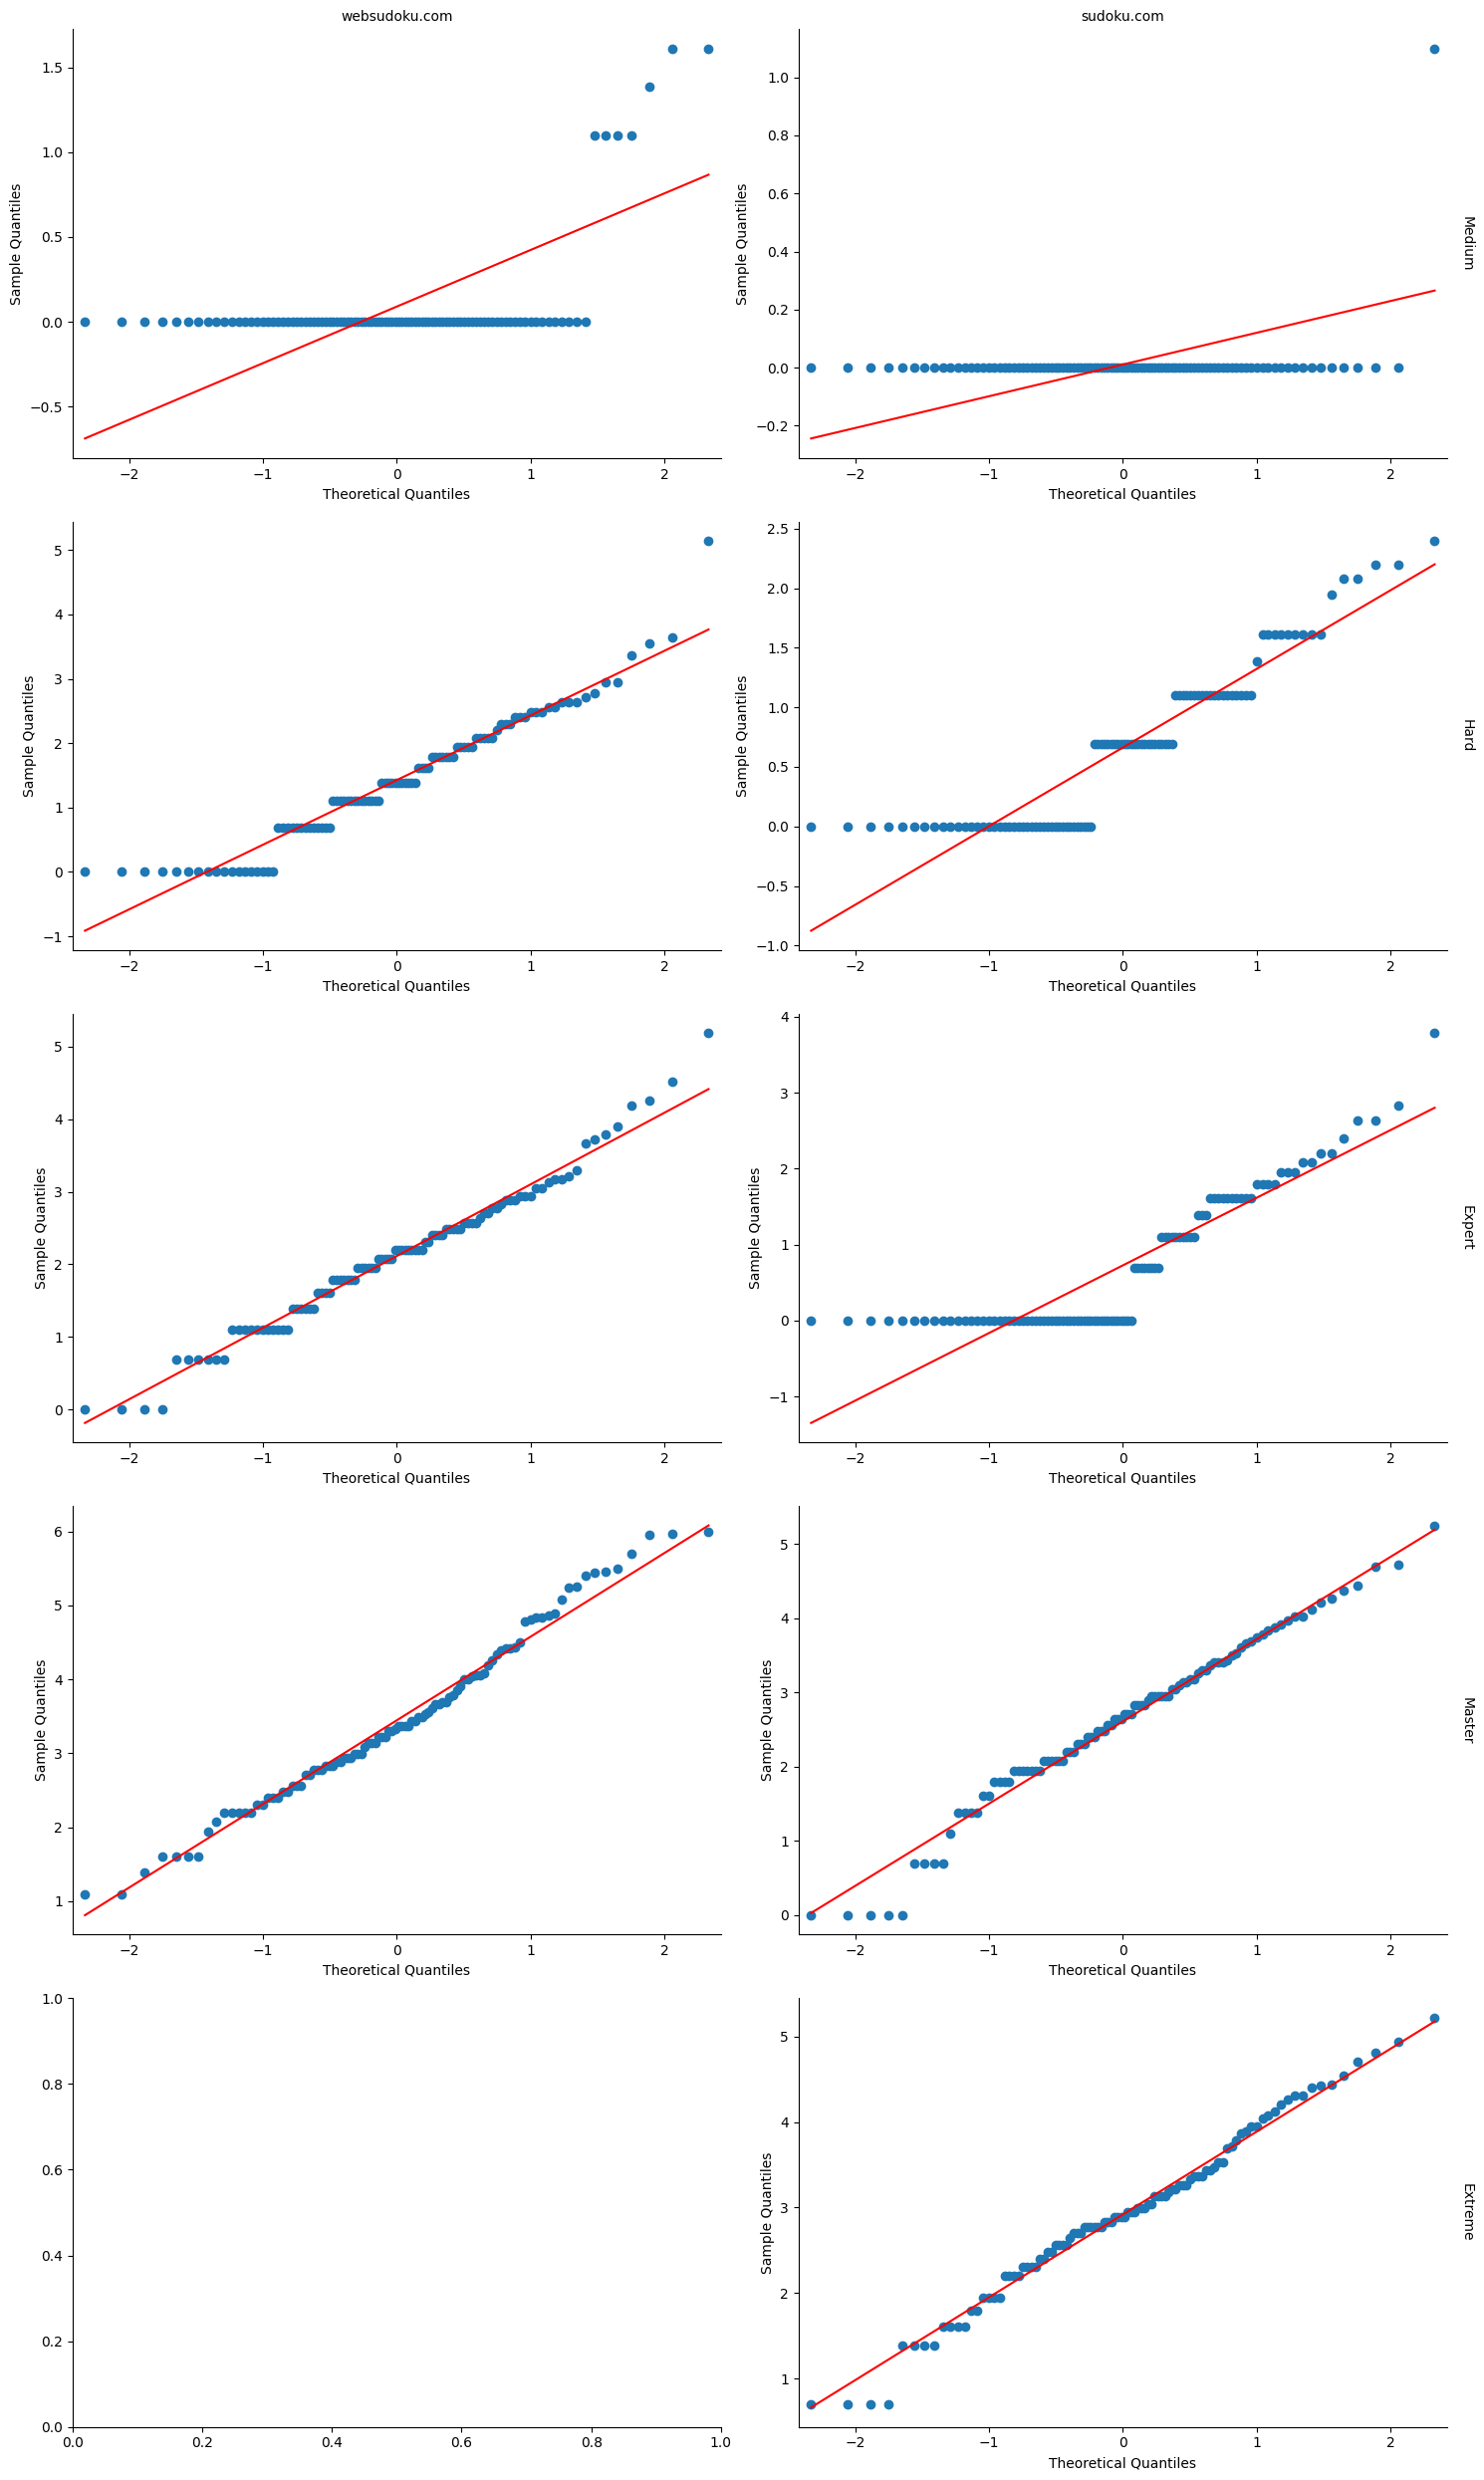

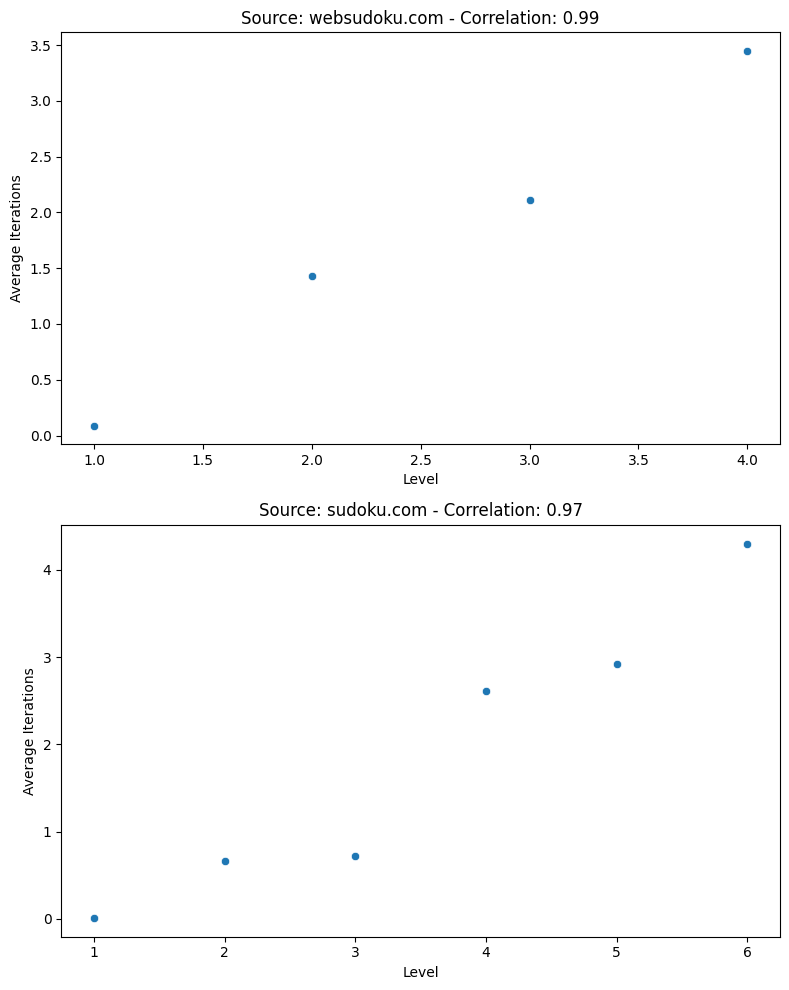

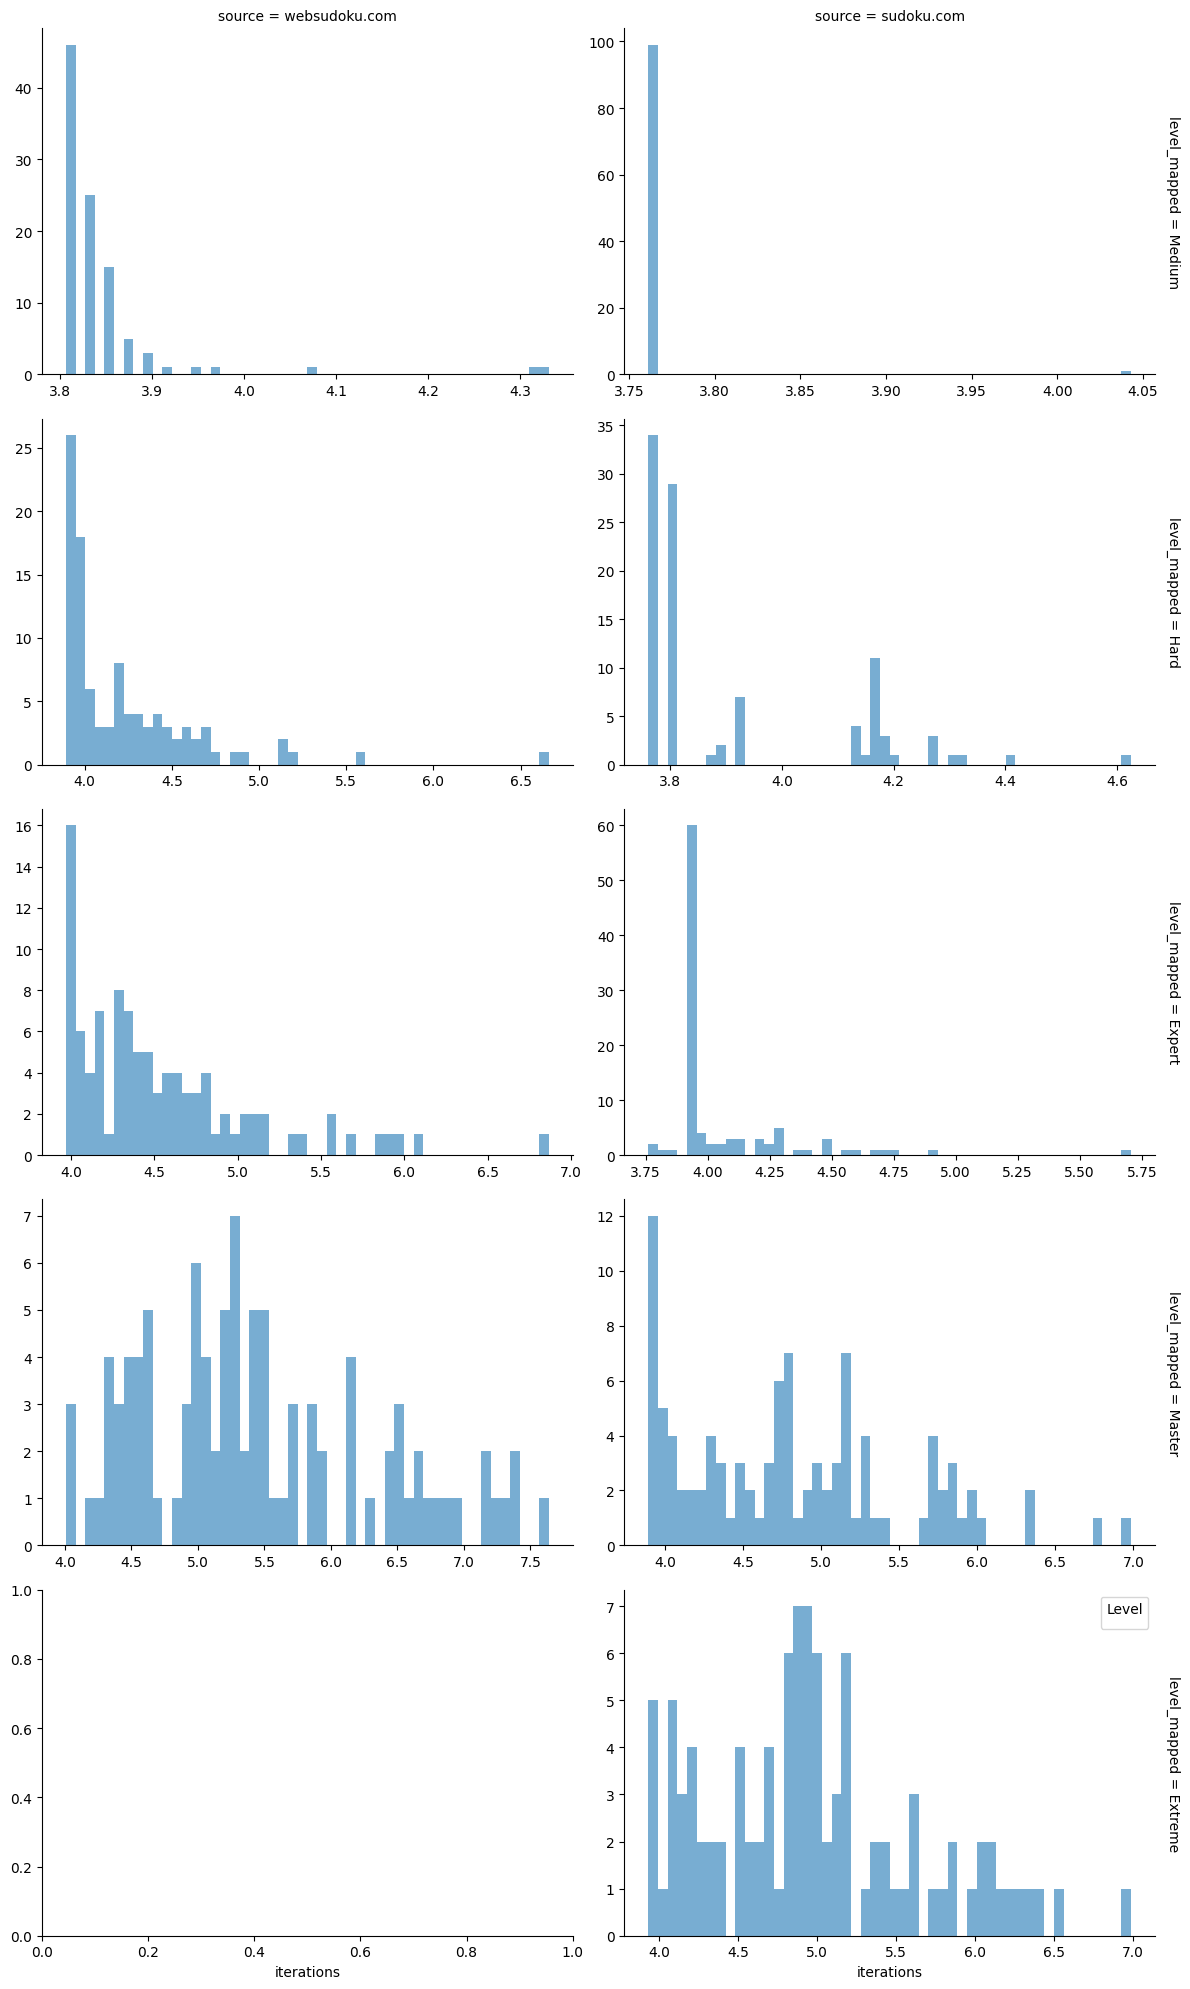

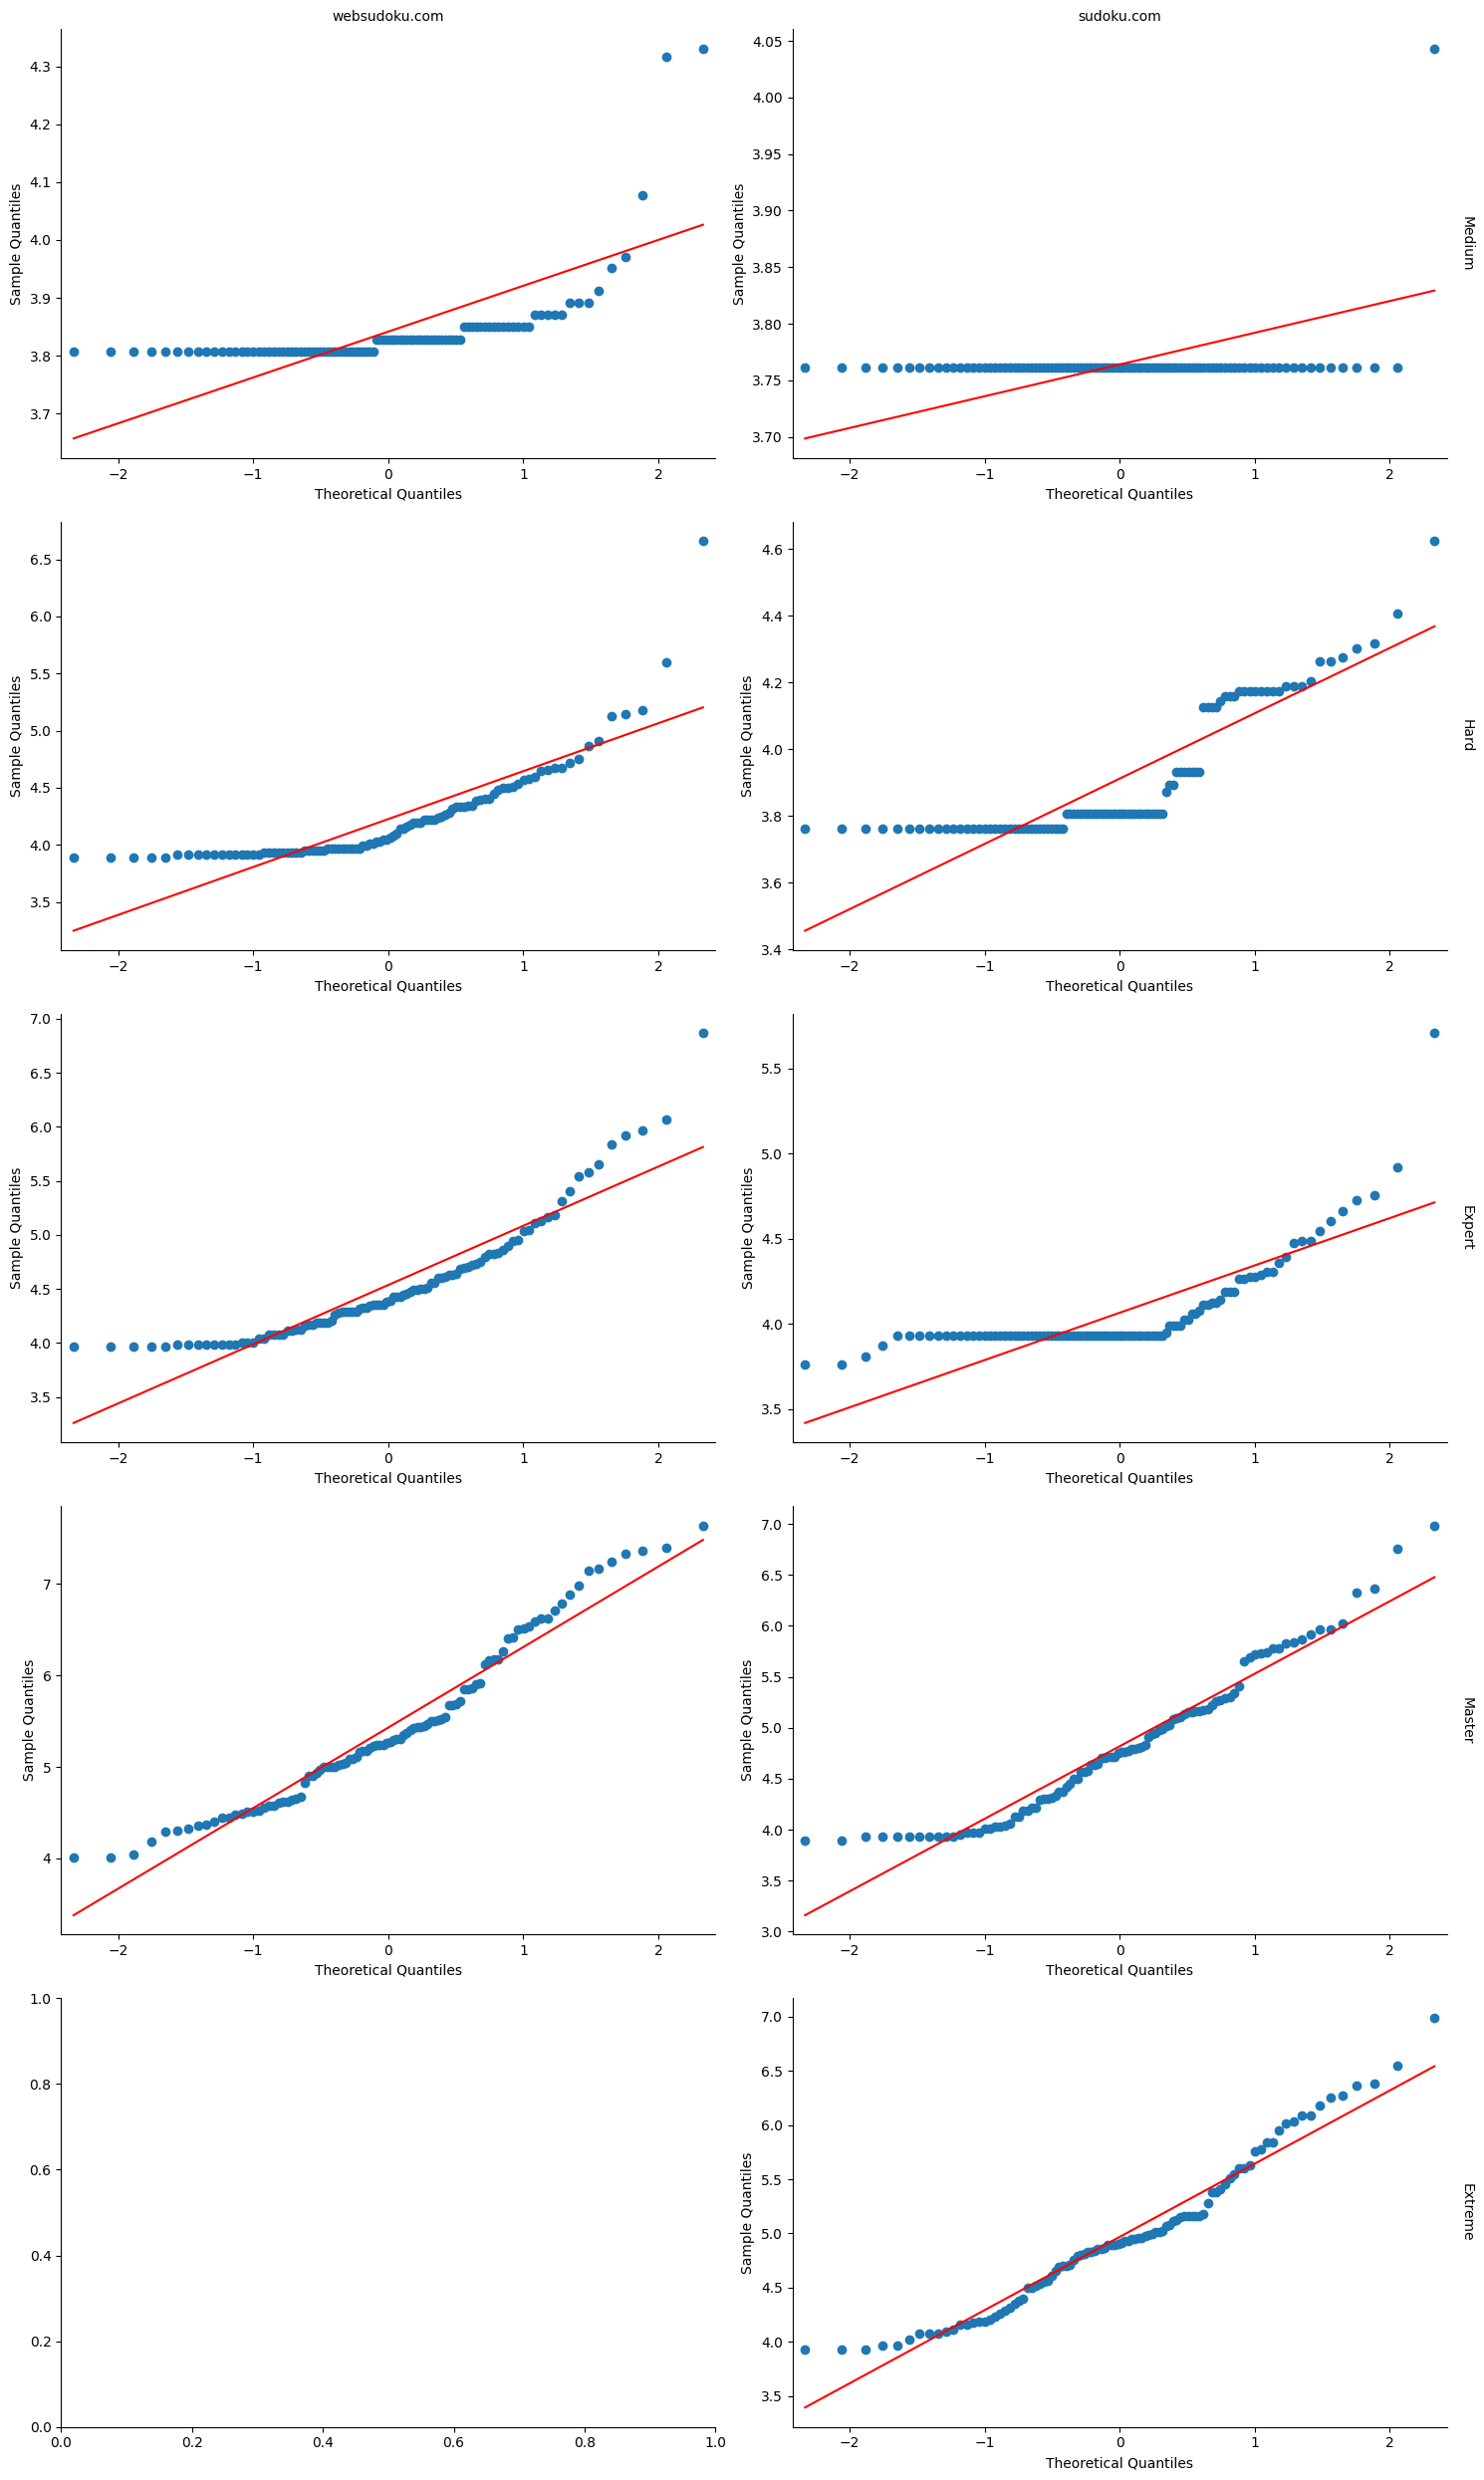

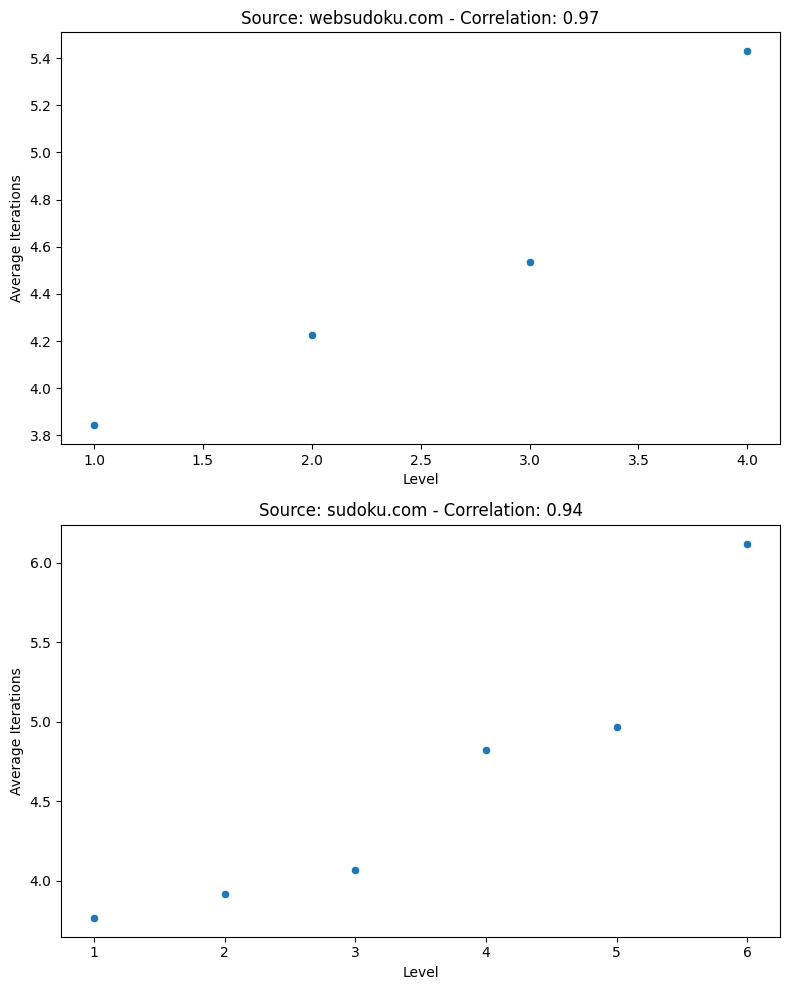

In [21]:
for data_file in data_files:
    data = pd.read_csv(data_file)
    data["iterations"] = data["iterations"].apply(np.log)
    data['level_int'] = data['level']
    data['level'] = data['level'].map(level_translation)
    plt1 = plot_histograms(data)
    plt1.savefig(f"{data_file}_histograms.png")
    plt2 = plot_qq_plots(data)
    plt2.savefig(f"{data_file}_qq_plots.png")
    plt3 = correlation_analysis(data)
    plt3.savefig(f"{data_file}_correlation.png")


